<a href="https://colab.research.google.com/github/scottspurlock/csc4466-2022s/blob/main/tutorials/day02_tutorial_image_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # CSC 4466 Computer Vision
 ## Day 2 Tutorial - Image Basics
 - Reading, writing, and displaying images
 - Image dimensions
 - Accessing pixels
 - Random numbers


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [ ]:
# Check versions
print(np.__version__)
print(cv2.__version__)

1.19.5
4.1.2


## Reading in images
To read in an image using OpenCV, the image must be in the same folder as the notebook running the code. You can download an image from the internet onto your computer, then drag the file from the download folder into Colab's storage (see the file folder icon to the left in Colab).

In [ ]:
img = cv2.imread('image.png')

if img is None:
  print('Unable to read image. Make sure it exists in the folder with this notebook.')
else:
  print('Image read with shape (rows, columns, color channels):', img.shape)


Unable to read image. Make sure it exists in the folder with this notebook.


In [ ]:
# Alternatively, we can use the Unix curl command to download the file from a URL.
image_file = 'https://www.elon.edu/u/wp-content/uploads/2018/06/administration-nav-section.jpg'
!curl -o image.png {image_file}
img = cv2.imread('image.png')
print()

if img is None:
  print('Unable to read image. Make sure it exists in the folder with this notebook.')
else:
  print('Image read with shape (rows, columns, color channels):', img.shape)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  164k  100  164k    0     0  1018k      0 --:--:-- --:--:-- --:--:-- 1018k

Image read with shape (rows, columns, color channels): (549, 976, 3)


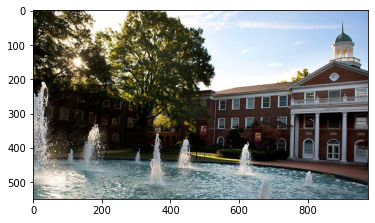

In [ ]:
# OpenCV expects BGR ordering, while matplotlib expects RGB.

disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert color for display

plt.imshow(disp)
plt.show()


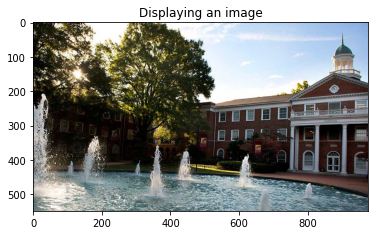

In [ ]:
# OpenCV can't read an image from a URL. We can use io.imread, however.
# Note that OpenCV uses BGR ordering, while scikit image and matplotlib use RGB.
from skimage import io
image_file = 'https://www.elon.edu/u/wp-content/uploads/2018/06/administration-nav-section.jpg'
rgb = io.imread(image_file)
plt.imshow(rgb)
plt.title('Displaying an image')
plt.show()

## Use shape to check image dimensions

In [ ]:
# Color images will be 3D arrays: height x width x 3 (color channels)
print(img.shape)

if len(img.shape) == 2:
  print('Grayscale image')
  h, w = img.shape
  ch = 1

else:
  print('Color image')
  h, w, ch = img.shape

print(f'Image shape is {h} pixels high by {w} pixels wide. There are {ch} channels.')

(549, 976, 3)
Color image
Image shape is 549 pixels high by 976 pixels wide. There are 3 channels.


## Accessing pixels

Setting a single pixel to be red
Setting a range of pixels to be yellow with array slicing
Saved!


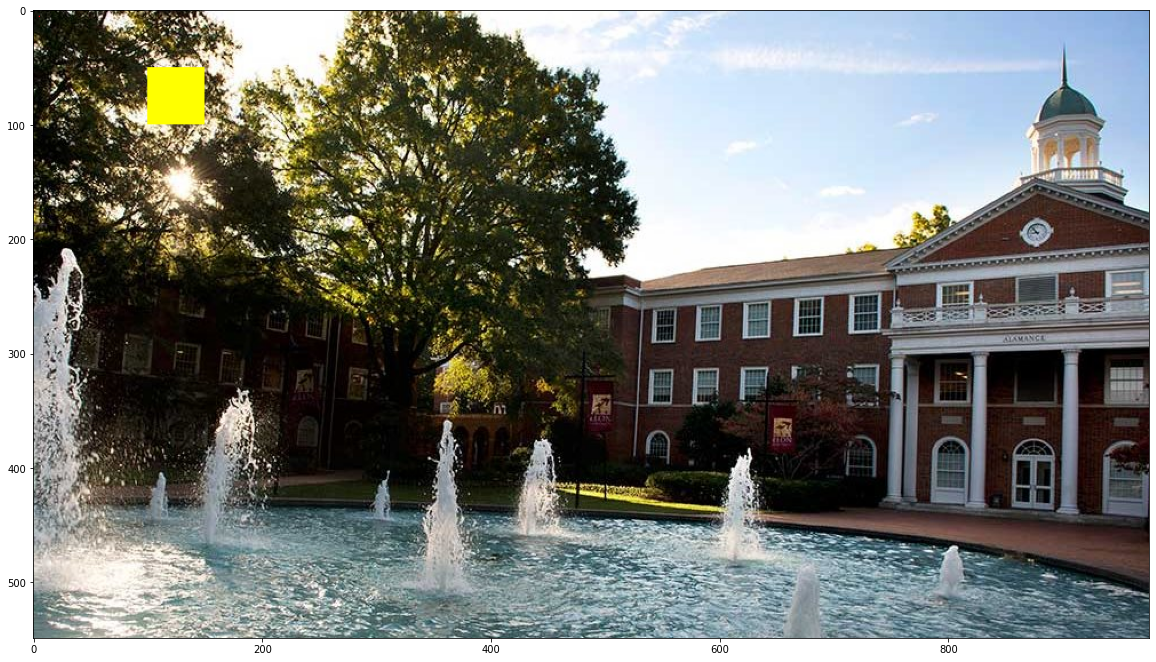

In [ ]:
# Images are stored as numpy arrays.
# Each 2D location is a pixel.

# Make a copy so the original isn't changed.
disp = img.copy()

# Always be aware if image is RGB or BGR.
# Assuming BGR...
print('Setting a single pixel to be red')
disp[5, 5] = [0, 0, 255]

print('Setting a range of pixels to be yellow with array slicing')
disp[50:100, 100:150] = [0, 255, 255]

# Save image
# Using a cv2 function, so expects BGR
cv2.imwrite('out.jpg', disp)
print('Saved!')

# Show image
# Using matplotlib, so expects RGB
disp = cv2.cvtColor(disp, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(disp)
plt.show()


## Generating random numbers
https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

np.random.randint(low, high=None, size=None, dtype=int)

In [ ]:
# A single random int between 0 and 10 (0 included, 10 not included)
rand_int = np.random.randint(0, 10)
print(rand_int)

0


In [ ]:
# We can specify a size and data type to get an array of, e.g., unsigned 8-bit ints.
rand_color = np.random.randint(low=0, high=256, size=3, dtype=np.uint8)
print(rand_color)

[ 10 190 108]


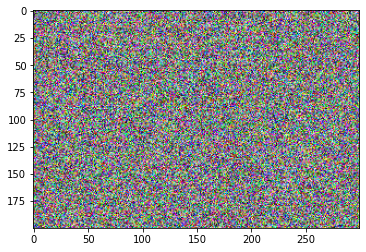

In [ ]:
# We could even make an entire image of random pixels.
rand_image = np.random.randint(low=0, high=256, size=(200, 300, 3), dtype=np.uint8)
plt.imshow(rand_image)
plt.show()

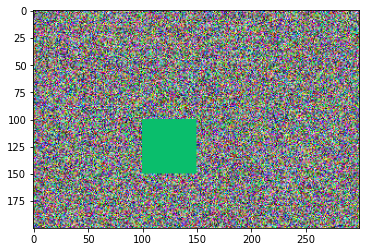

In [ ]:
# Updating the random image using array slicing
rand_image[100:150, 100:150] = rand_color
plt.imshow(rand_image)
plt.show()